In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install oidv6

In [ ]:
# download data and move it to Drive so that it doesn't need to be downloaded each time the notebook is run

!echo "Y" | oidv6 downloader --classes cat car pizza --type_data train --no_labels --limit 1000 --dest_dir OIDv6/train
!echo "Y" | oidv6 downloader --classes cat car pizza --type_data test --no_labels --limit 150 --dest_dir OIDv6/test
!echo "Y" | oidv6 downloader --classes cat car pizza --type_data validation --no_labels --limit 150 --dest_dir OIDv6/validation

----------------------------------------------------------------------------------------------------
OIDv6 - Downloading single or multiple classes from the Open Images V6 Dataset ...
----------------------------------------------------------------------------------------------------
[2024-03-19 21:15:50] Start: 
	Author: Dmitry Ryumin
	Email: dl_03.03.1991@mail.ru
	Maintainer: Dmitry Ryumin
	Version: 1.0.5
----------------------------------------------------------------------------------------------------
[2024-03-19 21:15:50] Checking command line arguments for validity ...
[2024-03-19 21:15:50] Creating Directories for Metadata ...
----------------------------------------------------------------------------------------------------
[2024-03-19 21:15:50] Downloading "cat" ...
    File "oidv6-train-annotations-bbox.csv" not found ...
        Automatic download ... 4411031 out of 4411031 (100%)                                        
    Extracting data from "oidv6-train-annotations-bbo

In [ ]:
import shutil

target_folder = "/content/drive/MyDrive/OIDv6"
download_folder = "/content/OIDv6"

#remove existing target folder if it exists
shutil.rmtree(target_folder)

shutil.copytree(original_folder, target_folder)

In [ ]:
!ls -la /content/drive/MyDrive/OIDv6/test

total 12
drwx------ 2 root root 4096 Mar 19 21:13 car
drwx------ 2 root root 4096 Mar 19 21:13 cat
drwx------ 2 root root 4096 Mar 19 21:14 pizza


In [ ]:
from google.colab import drive
import os
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Function to resize images in a folder
def resize_images_in_folder(folder_path):
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]

    # Define the desired size for the resized images
    desired_size = (224, 224)  # Adjust the size as needed

    # Iterate over each image file and resize it
    for image_file in image_files:
        # Open the image file
        with Image.open(os.path.join(folder_path, image_file)) as img:
            # Resize the image
            resized_img = img.resize(desired_size, Image.ANTIALIAS)

            # Overwrite the original image with the resized image
            resized_img.save(os.path.join(folder_path, image_file))

# Resize images in specified directories
directories_to_resize = [
    "/content/drive/MyDrive/OIDv6/validation/car",
    "/content/drive/MyDrive/OIDv6/validation/cat",
    "/content/drive/MyDrive/OIDv6/validation/pizza",
    "/content/drive/MyDrive/OIDv6/train/car",
    "/content/drive/MyDrive/OIDv6/train/cat",
    "/content/drive/MyDrive/OIDv6/train/pizza"
]

for directory in directories_to_resize:
    resize_images_in_folder(directory)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder_test = '/content/drive/MyDrive/OIDv6/test'
folder_validation = '/content/drive/MyDrive/OIDv6/validation'
folder_train = '/content/drive/MyDrive/OIDv6/train'

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F

DIM = 32
CH = 3

class Net(nn.Module):
    def __init__(self, num_classes=3):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=CH, out_channels=32, kernel_size=3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout2d(p=0.2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout2 = nn.Dropout2d(p=0.3)

        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.batchnorm5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.batchnorm6 = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.dropout3 = nn.Dropout2d(p=0.4)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * (DIM // 8) * (DIM // 8), 128)
        self.batchnorm_fc = nn.BatchNorm1d(128)
        self.dropout_fc = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.batchnorm1(x)
        x = torch.relu(self.conv2(x))
        x = self.batchnorm2(x)
        x = self.maxpool1(x)
        x = self.dropout1(x)

        x = torch.relu(self.conv3(x))
        x = self.batchnorm3(x)
        x = torch.relu(self.conv4(x))
        x = self.batchnorm4(x)
        x = self.maxpool2(x)
        x = self.dropout2(x)

        x = torch.relu(self.conv5(x))
        x = self.batchnorm5(x)
        x = torch.relu(self.conv6(x))
        x = self.batchnorm6(x)
        x = self.maxpool3(x)
        x = self.dropout3(x)

        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.batchnorm_fc(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)

        return x

# Define your model
model = Net(num_classes=3)

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.4, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomGrayscale(p=0.1),
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'validation': transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'test': transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
}

In [ ]:
train_data = datasets.ImageFolder(folder_train, transform=data_transforms['train'])
test_data = datasets.ImageFolder(folder_test, transform=data_transforms['test'])
validation_data = datasets.ImageFolder(folder_test, transform=data_transforms['validation'])

num_workers = 2

# loading data
train_loader = DataLoader(train_data, batch_size=16, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False, num_workers=num_workers)
validation_loader = DataLoader(validation_data, batch_size=16, shuffle=False, num_workers=num_workers)

In [ ]:
import torch
import torch.optim as optim
import numpy as np

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net().to(device)

# loss function. It is combined with softmax:)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# to plot accuracy and loss
history_acc = []
history_loss = []
history_val_acc = []
history_val_loss = []

num_epochs = 30

for epoch in range(num_epochs):
    # starting training
    model.train()
    train_loss_values = np.array([], dtype = np.float32)
    train_corrects = 0

    for i, (inputs, labels) in enumerate(train_loader, 1):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        train_corrects += torch.sum(preds == labels.data)
        train_loss_values = np.append(train_loss_values, loss.cpu().detach().numpy())

        loss.backward()
        optimizer.step()

        optimizer.zero_grad()

        if i % 50 == 0:
           print(f"Step: train_loss {np.mean(train_loss_values):.4f}")

    epoch_loss = np.mean(train_loss_values)
    epoch_acc = train_corrects.double() / len(train_data)
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Trn Loss: {epoch_loss:.4f}, Trn Acc: {epoch_acc:.4f}")
    history_acc.append(epoch_acc)
    history_loss.append(epoch_loss)

    # validation (without dropouts)
    model.eval()
    val_loss_values = np.array([], dtype = np.float32)
    val_corrects = 0

    with torch.no_grad():
      for inputs, labels in validation_loader:
          inputs, labels = inputs.to(device), labels.to(device)

          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)

          val_loss_values = np.append(val_loss_values, loss.cpu().detach().numpy())
          val_corrects += torch.sum(preds == labels.data)

    epoch_loss = np.mean(val_loss_values)
    epoch_acc = val_corrects.double() / len(test_data)
    print(f"Val Loss: {epoch_loss:.4f}, Val Acc: {epoch_acc:.4f}")
    history_val_acc.append(epoch_acc)
    history_val_loss.append(epoch_loss)


Step: train_loss 1.1328
Step: train_loss 1.0498
Step: train_loss 1.0067
Epoch [1/30]
Trn Loss: 0.9787, Trn Acc: 0.5547
Val Loss: 0.6703, Val Acc: 0.7178
Step: train_loss 0.8528
Step: train_loss 0.8485
Step: train_loss 0.8318
Epoch [2/30]
Trn Loss: 0.8239, Trn Acc: 0.6283
Val Loss: 0.5590, Val Acc: 0.7756
Step: train_loss 0.8274
Step: train_loss 0.7930
Step: train_loss 0.7672
Epoch [3/30]
Trn Loss: 0.7545, Trn Acc: 0.6787
Val Loss: 0.4791, Val Acc: 0.8111
Step: train_loss 0.7282
Step: train_loss 0.7223
Step: train_loss 0.7246
Epoch [4/30]
Trn Loss: 0.7295, Trn Acc: 0.6947
Val Loss: 0.4467, Val Acc: 0.8378
Step: train_loss 0.7467
Step: train_loss 0.7400
Step: train_loss 0.7208
Epoch [5/30]
Trn Loss: 0.7189, Trn Acc: 0.7027
Val Loss: 0.4259, Val Acc: 0.8511
Step: train_loss 0.6667
Step: train_loss 0.6850
Step: train_loss 0.6612
Epoch [6/30]
Trn Loss: 0.6572, Trn Acc: 0.7313
Val Loss: 0.3671, Val Acc: 0.8556
Step: train_loss 0.6443
Step: train_loss 0.6748
Step: train_loss 0.6873
Epoch [7/3

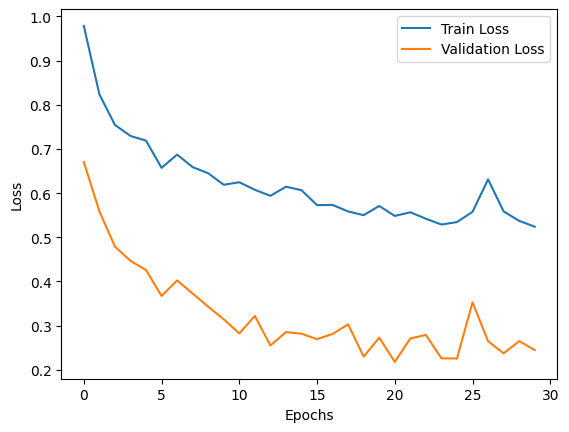

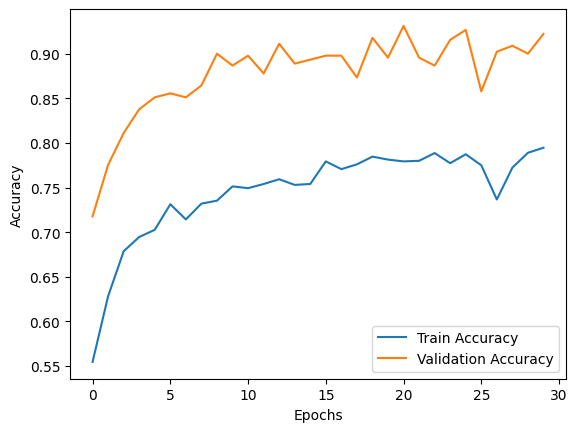

In [ ]:
# Plot training history
plt.plot(history_loss, label='Train Loss')
plt.plot(history_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

history_acc = [acc.cpu().numpy() for acc in history_acc]
history_val_acc = [val_acc.cpu().numpy() for val_acc in history_val_acc]

# Plot accuracy history
plt.plot(history_acc, label='Train Accuracy')
plt.plot(history_val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# test
model.eval()
y_true = []
y_pred = []

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

    y_true.extend(labels.cpu().numpy())
    y_pred.extend(preds.cpu().numpy())

In [ ]:
# get class names
data_dir = '/content/drive/MyDrive/OIDv6/test'
dataset = datasets.ImageFolder(data_dir)

class_names = dataset.classes

print(class_names)

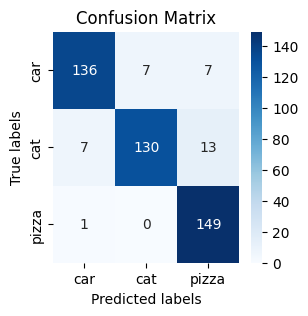

              precision    recall  f1-score   support

         car       0.94      0.91      0.93       150
         cat       0.95      0.87      0.91       150
       pizza       0.88      0.99      0.93       150

    accuracy                           0.92       450
   macro avg       0.93      0.92      0.92       450
weighted avg       0.93      0.92      0.92       450



In [ ]:
# metric visualisation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)

# visualize confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/modelwithtorch5.pth")